In [3]:
import math
import copy
import numpy as np
from matrixlib import Matrix

In [4]:
Rx = Matrix(3,3)
Ry = Matrix(3,3)
Rz = Matrix(3,3)

In [5]:

def SetRxMat( R, roll):
    R[0,0] = 1.0
    R[0,1] = 0.0
    R[0,2] = 0.0
    R[1,0] = 0.0
    R[1,1] = np.cos(roll)
    R[1,2] = - np.sin(roll)
    R[2,0] = 0.0
    R[2,1] = np.sin(roll)
    R[2,2] = np.cos(roll)

def SetRyMat( R, pitch):
    R[0,0] = np.cos(pitch)
    R[0,1] = 0.0
    R[0,2] = np.sin(pitch)
    R[1,0] = 0.0
    R[1,1] = 1.0
    R[1,2] = 0.0
    R[2,0] = -np.sin(pitch)
    R[2,1] = 0.0
    R[2,2] = np.cos(pitch)

def SetRzMat( R, yaw):
    R[0,0] = np.cos(yaw)
    R[0,1] = -np.sin(yaw)
    R[0,2] = 0.0
    R[1,0] = np.sin(yaw)
    R[1,1] = np.cos(yaw)
    R[1,2] = 0.0
    R[2,0] = 0.0
    R[2,1] = 0.0
    R[2,2] = 1.0  

In [6]:
roll = 90.0
pitch = 0.0
yaw = 0.0
deg2rad = np.pi / 180.0
roll *= deg2rad
pitch *= deg2rad
yaw *= deg2rad 
print(yaw)

0.0


In [7]:
SetRxMat(Rx, roll)
SetRyMat(Ry, pitch)
SetRzMat(Rz, yaw)

In [8]:
state = Matrix(3,1)
state[0,0] = 1
state[1,0] = 0
state[2,0] = 1

In [9]:
new_state = Rz * Rx * Ry * state

In [10]:
print(state)

|	1.000	|
|	0.000	|
|	1.000	|



In [11]:
print(new_state)

|	1.000	|
|	-1.000	|
|	0.000	|



In [12]:
print("Rx=\n",Rx)
print("Ry=\n",Ry)
print("Rz=\n",Rz)

Rx=
 |	1.000	0.000	0.000	|
|	0.000	0.000	-1.000	|
|	0.000	1.000	0.000	|

Ry=
 |	1.000	0.000	0.000	|
|	0.000	1.000	0.000	|
|	-0.000	0.000	1.000	|

Rz=
 |	1.000	-0.000	0.000	|
|	0.000	1.000	0.000	|
|	0.000	0.000	1.000	|



|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



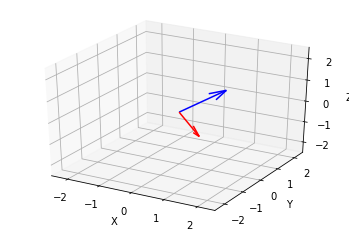

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

O = Matrix(3,1)
O[0,0] = 0
O[1,0] = 0
O[2,0] = 0

length = np.sqrt(np.power(state[0,0] - O[0,0], 2) + np.power(state[1,0] - O[1,0], 2) + np.power(state[2,0] - O[2,0],2))
ax.quiver(O[0,0], O[1,0], O[2,0], state[0,0], state[1,0], state[2,0], length=length, color="blue")
ax.quiver(O[0,0], O[1,0], O[2,0], new_state[0,0], new_state[1,0], new_state[2,0], length=length, color="red")
print(state)
print("(",roll,",",pitch,",",yaw,")")

print(new_state)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-(length+1),length+1)
ax.set_ylim(-(length+1),length+1)
ax.set_zlim(-(length+1),length+1)
plt.show()

|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



Text(0.5, 1.0, 'X-Y plot')

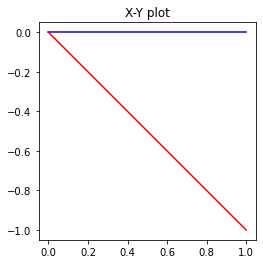

In [14]:
fig,ax = plt.subplots()
ax.set_aspect("equal")

x = [O[0,0],state[0,0]]
y = [O[1,0],state[1,0]]
z = [O[2,0],state[2,0]]

new_x = [O[0,0],new_state[0,0]]
new_y = [O[1,0],new_state[1,0]]
new_z = [O[2,0],new_state[2,0]]
print(state)
print("(",roll,",",pitch,",",yaw,")")
print(new_state)
ax.plot(x,y,color="blue")
ax.plot(new_x,new_y,color="red")
ax.set_title("X-Y plot")

|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



Text(0.5, 1.0, 'X-Z plot')

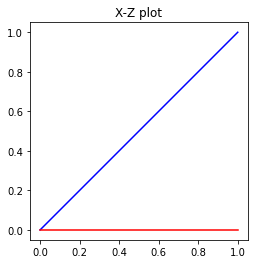

In [15]:
fig,ax = plt.subplots()
ax.set_aspect("equal")

x = [O[0,0],state[0,0]]
y = [O[1,0],state[1,0]]
z = [O[2,0],state[2,0]]

new_x = [O[0,0],new_state[0,0]]
new_y = [O[1,0],new_state[1,0]]
new_z = [O[2,0],new_state[2,0]]
print(state)
print("(",roll,",",pitch,",",yaw,")")

print(new_state)
ax.plot(x,z,color="blue")
ax.plot(new_x,new_z,color="red")
ax.set_title("X-Z plot")

|	1.000	|
|	0.000	|
|	1.000	|

( 1.5707963267948966 , 0.0 , 0.0 )
|	1.000	|
|	-1.000	|
|	0.000	|



Text(0.5, 1.0, 'Y-Z plot')

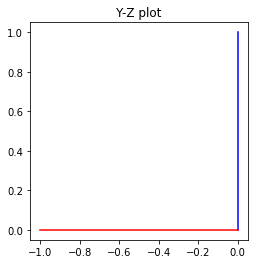

In [16]:
fig,ax = plt.subplots()
ax.set_aspect("equal")

x = [O[0,0],state[0,0]]
y = [O[1,0],state[1,0]]
z = [O[2,0],state[2,0]]

new_x = [O[0,0],new_state[0,0]]
new_y = [O[1,0],new_state[1,0]]
new_z = [O[2,0],new_state[2,0]]
print(state)
print("(",roll,",",pitch,",",yaw,")")

print(new_state)
ax.plot(y,z,color="blue")
ax.plot(new_y,new_z,color="red")
ax.set_title("Y-Z plot")